<a href="https://colab.research.google.com/github/ravi1728/New1/blob/master/170040013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://gnr638.s3.ap-south-1.amazonaws.com/train.zip \
    -O /content/train.zip
  
!wget --no-check-certificate \
    https://gnr638.s3.ap-south-1.amazonaws.com/test.zip \
    -O /content/test.zip

--2020-10-15 13:22:30--  https://gnr638.s3.ap-south-1.amazonaws.com/train.zip
Resolving gnr638.s3.ap-south-1.amazonaws.com (gnr638.s3.ap-south-1.amazonaws.com)... 3.5.208.189
Connecting to gnr638.s3.ap-south-1.amazonaws.com (gnr638.s3.ap-south-1.amazonaws.com)|3.5.208.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26877673 (26M) [application/zip]
Saving to: ‘/content/train.zip’

/content/train.zip  100%[===================>]  25.63M  14.3MB/s    in 1.8s    

2020-10-15 13:22:33 (14.3 MB/s) - ‘/content/train.zip’ saved [26877673/26877673]

--2020-10-15 13:22:33--  https://gnr638.s3.ap-south-1.amazonaws.com/test.zip
Resolving gnr638.s3.ap-south-1.amazonaws.com (gnr638.s3.ap-south-1.amazonaws.com)... 52.219.66.63
Connecting to gnr638.s3.ap-south-1.amazonaws.com (gnr638.s3.ap-south-1.amazonaws.com)|52.219.66.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5324835 (5.1M) [application/zip]
Saving to: ‘/content/test.zip’

/content/te

In [2]:
from zipfile import ZipFile
import os

local_zip = 'train.zip'
zip_ref = ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [3]:
local_zip = 'test.zip'
zip_ref = ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
NUM_EPOCHS = 100
INIT_LR = 0.0001
BS = 28

height=256
width=256
depth=3
		
classes=7
TRAINING_DIR = "./train"
total_train=0


for dir in os.listdir(TRAINING_DIR):
  total_train+=len(os.listdir(os.path.join(TRAINING_DIR, dir)))

print(total_train)

560


In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator



image_generator = ImageDataGenerator(
      rescale = 1./255,
      validation_split=0.1, 
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



train_generator = image_generator.flow_from_directory(
	TRAINING_DIR,
  subset="training",
	target_size=(256,256),
	class_mode='categorical',
	color_mode="rgb",
	shuffle=True,
	batch_size=BS
)

validation_generator = image_generator.flow_from_directory(
    TRAINING_DIR,
    shuffle=True,
    target_size=(256, 256), 
    subset="validation",
    class_mode='categorical',
	  color_mode="rgb")


Found 504 images belonging to 7 classes.
Found 56 images belonging to 7 classes.


In [6]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator,validation_data=validation_generator ,epochs=NUM_EPOCHS)

Epoch 1/100
18/18 [==============================] - 10s 566ms/step - loss: 2.4491 - accuracy: 0.1488 - val_loss: 1.7285 - val_accuracy: 0.4643
Epoch 2/100
18/18 [==============================] - 10s 536ms/step - loss: 1.8364 - accuracy: 0.3234 - val_loss: 1.3714 - val_accuracy: 0.4643
Epoch 3/100
18/18 [==============================] - 10s 533ms/step - loss: 1.2346 - accuracy: 0.4861 - val_loss: 1.1417 - val_accuracy: 0.5714
Epoch 4/100
18/18 [==============================] - 9s 526ms/step - loss: 1.1751 - accuracy: 0.5397 - val_loss: 1.0929 - val_accuracy: 0.5536
Epoch 5/100
18/18 [==============================] - 10s 531ms/step - loss: 1.2220 - accuracy: 0.5615 - val_loss: 1.2530 - val_accuracy: 0.6607
Epoch 6/100
18/18 [==============================] - 9s 527ms/step - loss: 1.0087 - accuracy: 0.5694 - val_loss: 3.7201 - val_accuracy: 0.1786
Epoch 7/100
18/18 [==============================] - 10s 534ms/step - loss: 1.0300 - accuracy: 0.6310 - val_loss: 0.8263 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


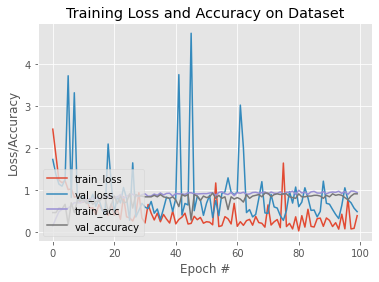

In [13]:
import matplotlib.pyplot as plt
import numpy as np
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()

H=history

print(H.history.keys())
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")

plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [14]:
mapping_dict=train_generator.class_indices

inv_mapping_dict=dict()
for (k,v) in mapping_dict.items():
  inv_mapping_dict[v]=k


In [15]:
inv_mapping_dict

{0: '1_basketball_court',
 1: '2_beach',
 2: '3_forest',
 3: '4_railway',
 4: '5_tennis_court',
 5: '6_swimming_pool',
 6: '7_others'}

In [16]:
imgs=sorted(os.listdir('./test_set'))

image_ids=[]
image_preds=[]
image_labels=[]

for a in imgs:
    path=os.path.join('./test_set',a)
    
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    pred = model.predict(x)

    image_ids.append(os.path.splitext(a)[0])

    #plt.imshow(img)
    print(path)
    print(pred)

    image_preds.append(int(np.argmax(pred)+1))
    print(np.argmax(pred)+1)

    image_labels.append(inv_mapping_dict[np.argmax(pred)])
    print(inv_mapping_dict[np.argmax(pred)])


./test_set/1001.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1002.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1003.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
7
7_others
./test_set/1004.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1005.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
7
7_others
./test_set/1006.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1007.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
7
7_others
./test_set/1008.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1009.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1010.jpg
[[0. 0. 0. 0. 0. 1. 0.]]
6
6_swimming_pool
./test_set/1011.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
7
7_others
./test_set/1012.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
7
7_others
./test_set/1013.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1014.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1015.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1016.jpg
[[0. 1. 0. 0. 0. 0. 0.]]
2
2_beach
./test_set/1017.jpg
[[0. 0. 0. 0. 0. 0. 1.]]
7
7_others
./test_set/1018.jpg
[[0. 0. 0. 0. 0. 1. 0.]]
6
6_sw

In [17]:
import pandas as pd

df=pd.DataFrame({
    "ImageID":image_ids,
    "Preds":image_preds,
    "Labels":image_labels
})

df1=pd.DataFrame({
    "ImageID":image_ids,
    "Label":image_preds
})

df.to_csv('data.csv', index=False , encoding='utf-8')

df1.to_csv('170040013.csv', index=False , encoding='utf-8')

In [18]:
from google.colab import files

files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
files.download('170040013.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = model.predict(images)
  plt.imshow(img)
  print(fn)
  print(pred)
  print(np.argmax(pred))
  print(inv_mapping_dict[np.argmax(pred)])